In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import src.DataFunctions as df
from src.LSTM import LSTM
from src.CNN import CNN
from src.Parallel import Parallel

# Data

Start by just loading in all of the data

In [3]:
df.read_save_audio(dataset_folder_path="data/music", pickle_path="data/pickles/AUDIO_PICKLE.pkl", sample_rate=16000)

blues.00000.au
blues.00001.au
blues.00002.au
blues.00003.au
blues.00004.au
blues.00005.au
blues.00006.au
blues.00007.au
blues.00008.au
blues.00009.au
blues.00010.au
blues.00011.au
blues.00012.au
blues.00013.au
blues.00014.au
blues.00015.au
blues.00016.au
blues.00017.au
blues.00018.au
blues.00019.au
blues.00020.au
blues.00021.au
blues.00022.au
blues.00023.au
blues.00024.au
blues.00025.au
blues.00026.au
blues.00027.au
blues.00028.au
blues.00029.au
blues.00030.au
blues.00031.au
blues.00032.au
blues.00033.au
blues.00034.au
blues.00035.au
blues.00036.au
blues.00037.au
blues.00038.au
blues.00039.au
blues.00040.au
blues.00041.au
blues.00042.au
blues.00043.au
blues.00044.au
blues.00045.au
blues.00046.au
blues.00047.au
blues.00048.au
blues.00049.au
blues.00050.au
blues.00051.au
blues.00052.au
blues.00053.au
blues.00054.au
blues.00055.au
blues.00056.au
blues.00057.au
blues.00058.au
blues.00059.au
blues.00060.au
blues.00061.au
blues.00062.au
blues.00063.au
blues.00064.au
blues.00065.au
blues.0006

In [3]:
audio_dataset = df.read_pickle("data/pickles/AUDIO_PICKLE.pkl")

Then split the data into smaller sub-samples and calculate the MFCCs, spectrograms, and YAMNET embeddings for each sub-sample

In [4]:
split_dataset = df.split_dataset(audio_dataset, num_sections=10)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [6]:
df.cal_save_MFCC(split_dataset, pickle_path="data/pickles/MFCC_SPLIT_PICKLE.pkl")

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


In [7]:
df.cal_save_embedding_spectrogram(dataset=split_dataset, pickle_embed_path="data/pickles/EMBED_SPLIT_PICKLE.pkl", pickle_spect_path="data/pickles/SPECT_SPLIT_PICKLE.pkl")

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


Also need to split each feature into training, testing, and validation sets

In [8]:
embeddings = df.read_pickle("data/pickles/EMBED_SPLIT_PICKLE.pkl")
spectrograms = df.read_pickle("data/pickles/SPECT_SPLIT_PICKLE.pkl")
MFCC = df.read_pickle("data/pickles/MFCC_SPLIT_PICKLE.pkl")

mfcc_x, mfcc_y = df.convert_data(dataset=MFCC)
mfcc_train_x, mfcc_valid_x, mfcc_train_y, mfcc_valid_y = train_test_split(mfcc_x, mfcc_y, train_size=0.9, random_state=1)
mfcc_train_x, mfcc_test_x, mfcc_train_y, mfcc_test_y = train_test_split(mfcc_train_x, mfcc_train_y, train_size=0.8, random_state=1)

spect_x, spect_y = df.convert_data(dataset=spectrograms)
spect_train_x, spect_valid_x, spect_train_y, spect_valid_y = train_test_split(spect_x, spect_y, train_size=0.9, random_state=1)
spect_train_x, spect_test_x, spect_train_y, spect_test_y = train_test_split(spect_train_x, spect_train_y, train_size=0.8, random_state=1)

embed_x, embed_y = df.convert_data(dataset=embeddings)
embed_train_x, embed_valid_x, embed_train_y, embed_valid_y = train_test_split(embed_x, embed_y, train_size=0.9, random_state=1)
embed_train_x, embed_test_x, embed_train_y, embed_test_y = train_test_split(embed_train_x, embed_train_y, train_size=0.8, random_state=1)


# Graph Sample

Visualizations of each of the different features:
- Waveform
- MFCCs
- Spectrogram
- YAMNET Embeddings (don't really visualize well)

The sample to use for the visualizations is just the first "pop" sub-sample.

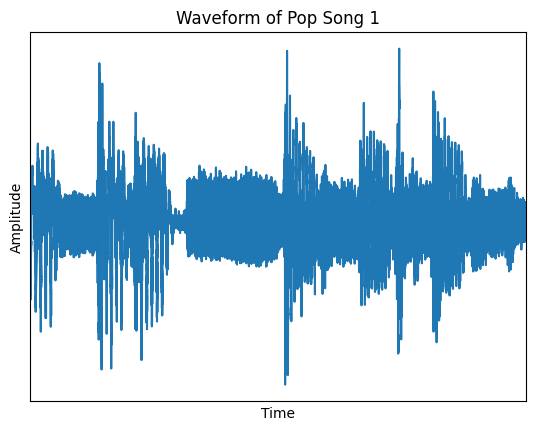

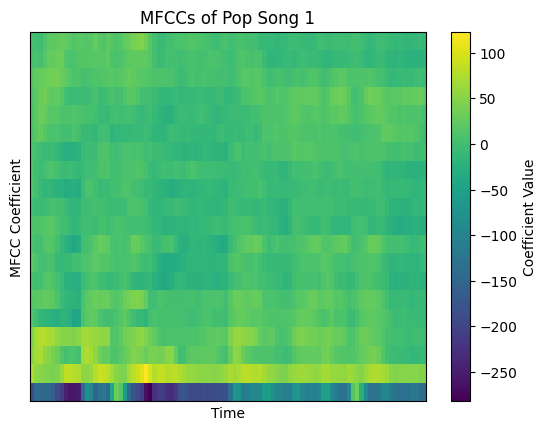

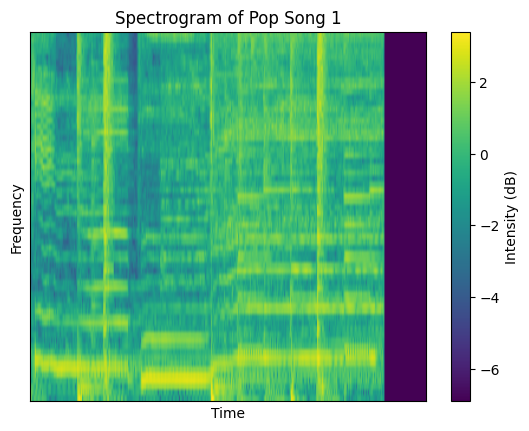

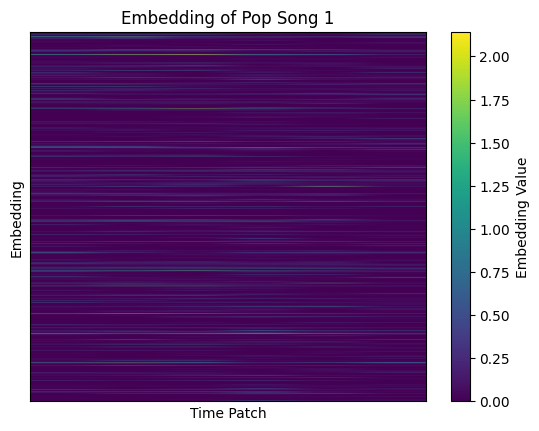

In [9]:
sample = split_dataset["pop"][0]
plt.plot(sample)
plt.title("Waveform of Pop Song 1")
plt.tick_params(which="both", bottom=False, top=False, left=False, right=False,
								labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.xlim([0, len(sample)])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig("./figs/Example_waveform.png")
plt.show()

mfcc_sample = MFCC["pop"][0]
plt.imshow(mfcc_sample.T, aspect="auto", origin="lower", cmap="viridis")
plt.title("MFCCs of Pop Song 1")
plt.tick_params(which="both", bottom=False, top=False, left=False, right=False,
								labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.savefig("figs/Example_mfcc.png")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficient")
plt.colorbar(label="Coefficient Value")
plt.show()

spectrogram_sample = spectrograms["pop"][0]
plt.imshow(spectrogram_sample.T, aspect="auto", origin="lower", cmap="viridis")
plt.title("Spectrogram of Pop Song 1")
plt.tick_params(which="both", bottom=False, top=False, left=False, right=False,
								labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.savefig("figs/Example_spectrogram.png")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label="Intensity (dB)")
plt.show()

embed_sample = embeddings["pop"][0]
plt.imshow(embed_sample.T, aspect="auto", origin="lower", cmap="viridis")
plt.title("Embedding of Pop Song 1")
plt.tick_params(which="both", bottom=False, top=False, left=False, right=False,
								labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.savefig("figs/Example_embedding.png")
plt.xlabel("Time Patch")
plt.ylabel("Embedding")
plt.colorbar(label="Embedding Value")
plt.show()

In [10]:
cnn = CNN()
cnn.train_model(train_x=mfcc_train_x, train_y=mfcc_train_y, test_x=mfcc_test_x, test_y=mfcc_test_y, epochs=30, steps_per_epoch=len(mfcc_train_y) // 8, batch_size=8, model_file="models/cnn_mfcc.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 20, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 94, 20, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 10, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 10, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 47, 10, 64)       2

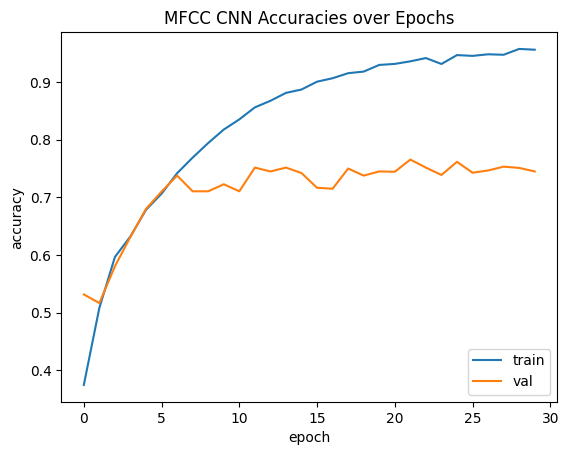

In [11]:
plt.plot(cnn.history.history["accuracy"])
plt.plot(cnn.history.history["val_accuracy"])
plt.title("MFCC CNN Accuracies over Epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "val"], loc="lower right")
plt.savefig("figs/cnn_mfcc.png")

In [12]:
cnn.predict(input_data=mfcc_valid_x, true_labels=mfcc_valid_y)

100/100 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

       blues       0.88      0.76      0.82       111
   classical       0.85      0.95      0.89       112
     country       0.67      0.53      0.59       105
       disco       0.82      0.61      0.70        92
      hiphop       0.88      0.68      0.77       110
        jazz       0.82      0.79      0.81        78
       metal       0.79      0.87      0.82       114
         pop       0.72      0.85      0.78       102
      reggae       0.62      0.89      0.73        81
        rock       0.53      0.58      0.55        95

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000

Overall Accuracy: 0.75


In [13]:
cnn = CNN()
cnn.train_model(train_x=spect_train_x, train_y=spect_train_y, test_x=spect_test_x, test_y=spect_test_y, epochs=30, steps_per_epoch=len(spect_train_y) // 8, batch_size=8, model_file="models/cnn_spect.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 336, 64, 32)       320       
                                                                 
 batch_normalization_3 (Batc  (None, 336, 64, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 168, 32, 32)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 168, 32, 32)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 168, 32, 64)       18496     
                                                                 
 batch_normalization_4 (Batc  (None, 168, 32, 64)     

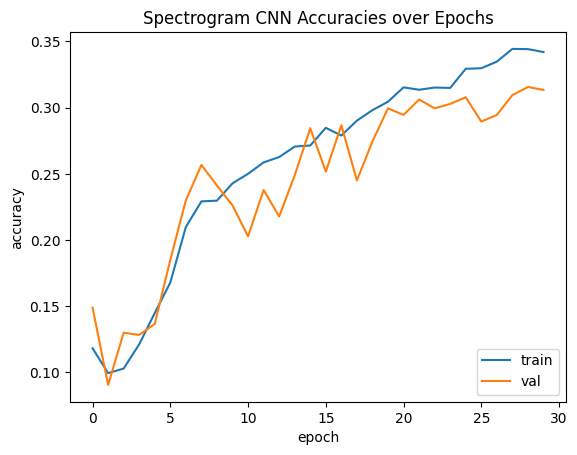

In [14]:
plt.plot(cnn.history.history["accuracy"])
plt.plot(cnn.history.history["val_accuracy"])
plt.title("Spectrogram CNN Accuracies over Epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "val"], loc="lower right")
plt.savefig("figs/cnn_spectrogram.png")

In [15]:
cnn.predict(input_data=spect_valid_x, true_labels=spect_valid_y)

100/100 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

       blues       0.30      0.27      0.28       111
   classical       0.91      0.74      0.82       112
     country       0.00      0.00      0.00       105
       disco       0.00      0.00      0.00        92
      hiphop       0.25      0.86      0.39       110
        jazz       0.31      0.82      0.45        78
       metal       0.00      0.00      0.00       114
         pop       0.07      0.04      0.05       102
      reggae       0.61      0.14      0.22        81
        rock       0.25      0.37      0.30        95

    accuracy                           0.32      1000
   macro avg       0.27      0.32      0.25      1000
weighted avg       0.27      0.32      0.25      1000

Overall Accuracy: 0.32


c:\Users\luked\Desktop\MusicGenreClassification\.conda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\luked\Desktop\MusicGenreClassification\.conda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\luked\Desktop\MusicGenreClassification\.conda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [16]:
cnn = CNN()
cnn.train_model(train_x=embed_train_x, train_y=embed_train_y, test_x=embed_test_x, test_y=embed_test_y, epochs=30, steps_per_epoch=len(embed_train_y) // 8, batch_size=8, model_file="models/cnn_embed.h5", feature_type="1d")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             327744    
                                                                 
 batch_normalization_6 (Batc  (None, 6, 64)            256       
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 dropout_4 (Dropout)         (None, 3, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            24704     
                                                                 
 batch_normalization_7 (Batc  (None, 3, 128)          

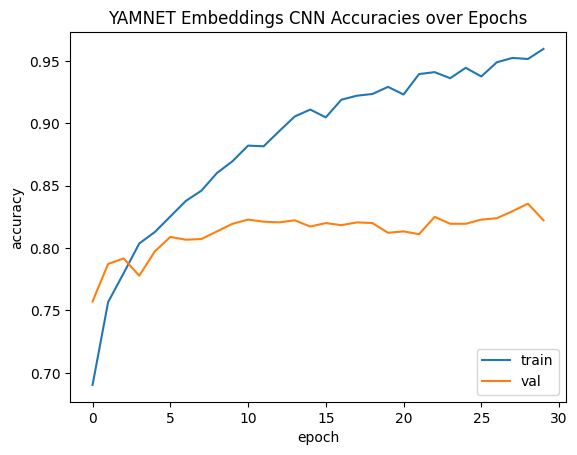

In [17]:
plt.plot(cnn.history.history["accuracy"])
plt.plot(cnn.history.history["val_accuracy"])
plt.title("YAMNET Embeddings CNN Accuracies over Epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "val"], loc="lower right")
plt.savefig("figs/cnn_embedding.png")

In [18]:
cnn.predict(input_data=embed_valid_x, true_labels=embed_valid_y)

100/100 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

       blues       0.77      0.85      0.81       111
   classical       0.95      0.97      0.96       112
     country       0.88      0.56      0.69       105
       disco       0.67      0.82      0.74        92
      hiphop       0.93      0.87      0.90       110
        jazz       0.90      0.92      0.91        78
       metal       0.92      0.85      0.88       114
         pop       0.80      0.73      0.76       102
      reggae       0.87      0.80      0.83        81
        rock       0.58      0.78      0.67        95

    accuracy                           0.81      1000
   macro avg       0.83      0.82      0.81      1000
weighted avg       0.83      0.81      0.82      1000

Overall Accuracy: 0.81


In [19]:
lstm = LSTM()
lstm.train_model(train_x=mfcc_train_x, test_x=mfcc_test_x, train_y=mfcc_train_y, test_y=mfcc_test_y, epochs=30, steps_per_epoch=len(mfcc_train_y) // 8, batch_size=8, model_file="models/lstm_mfcc.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 94, 256)          152576    
 l)                                                              
                                                                 
 batch_normalization_8 (Batc  (None, 94, 256)          1024      
 hNormalization)                                                 
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)              

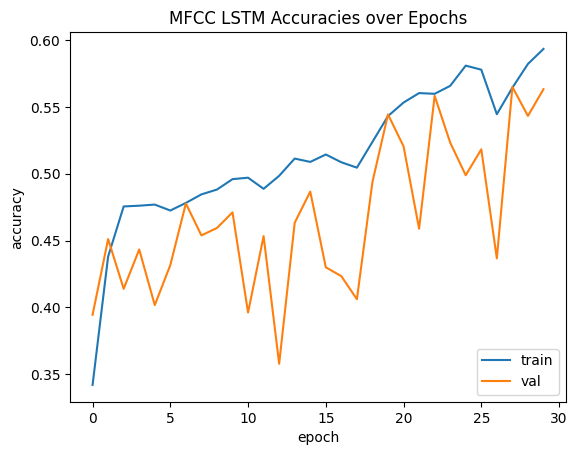

In [20]:
plt.plot(lstm.history.history["accuracy"])
plt.plot(lstm.history.history["val_accuracy"])
plt.title("MFCC LSTM Accuracies over Epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "val"], loc="lower right")
plt.savefig("figs/lstm_mfcc.png")

In [22]:
lstm.predict(input_data=mfcc_valid_x, true_labels=mfcc_valid_y)

100/100 [==============================] - 2s 16ms/step
Classification Report:
              precision    recall  f1-score   support

       blues       0.65      0.51      0.57       111
   classical       0.66      0.84      0.74       112
     country       0.76      0.25      0.37       105
       disco       0.54      0.49      0.51        92
      hiphop       0.78      0.38      0.51       110
        jazz       0.49      0.74      0.59        78
       metal       0.60      0.91      0.72       114
         pop       0.84      0.74      0.79       102
      reggae       0.44      0.73      0.55        81
        rock       0.39      0.34      0.36        95

    accuracy                           0.59      1000
   macro avg       0.61      0.59      0.57      1000
weighted avg       0.63      0.59      0.58      1000

Overall Accuracy: 0.59


In [23]:
lstm = LSTM()
lstm.train_model(train_x=spect_train_x, test_x=spect_test_x, train_y=spect_train_y, test_y=spect_test_y, epochs=30, steps_per_epoch=len(spect_train_y) // 8, batch_size=8, model_file="models/lstm_spect.h5")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 336, 256)         197632    
 nal)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 336, 256)         1024      
 chNormalization)                                                
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 batch_normalization_11 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 128)              

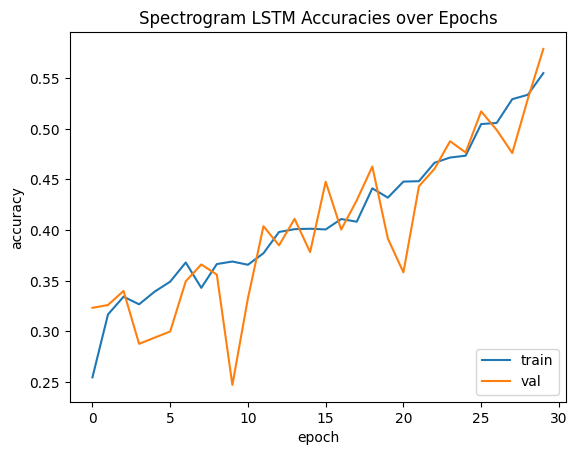

In [24]:
plt.plot(lstm.history.history["accuracy"])
plt.plot(lstm.history.history["val_accuracy"])
plt.title("Spectrogram LSTM Accuracies over Epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "val"], loc="lower right")
plt.savefig("figs/lstm_spectrogram.png")

In [25]:
lstm.predict(input_data=spect_valid_x, true_labels=spect_valid_y)

100/100 [==============================] - 5s 33ms/step
Classification Report:
              precision    recall  f1-score   support

       blues       0.68      0.38      0.49       111
   classical       0.73      0.98      0.84       112
     country       0.45      0.47      0.46       105
       disco       0.52      0.43      0.47        92
      hiphop       0.74      0.44      0.55       110
        jazz       0.47      0.60      0.53        78
       metal       0.79      0.82      0.81       114
         pop       0.69      0.82      0.75       102
      reggae       0.45      0.72      0.55        81
        rock       0.37      0.26      0.31        95

    accuracy                           0.60      1000
   macro avg       0.59      0.59      0.58      1000
weighted avg       0.60      0.60      0.58      1000

Overall Accuracy: 0.60


In [26]:
lstm = LSTM()
lstm.train_model(train_x=embed_train_x, test_x=embed_test_x, train_y=embed_train_y, test_y=embed_test_y, epochs=30, steps_per_epoch=len(embed_train_y) // 8, batch_size=8, model_file="models/lstm_embed.h5")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 6, 256)           1180672   
 nal)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 6, 256)           1024      
 chNormalization)                                                
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 batch_normalization_13 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 128)              

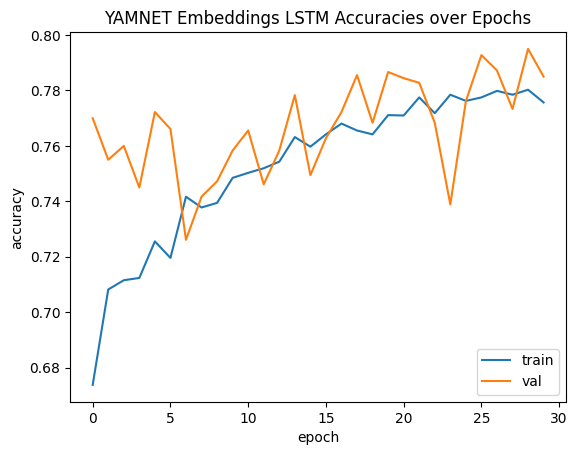

In [27]:
plt.plot(lstm.history.history["accuracy"])
plt.plot(lstm.history.history["val_accuracy"])
plt.title("YAMNET Embeddings LSTM Accuracies over Epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "val"], loc="lower right")
plt.savefig("figs/lstm_embedding.png")

In [28]:
lstm.predict(input_data=embed_valid_x, true_labels=embed_valid_y)

100/100 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

       blues       0.81      0.68      0.74       111
   classical       0.94      0.96      0.95       112
     country       0.91      0.50      0.64       105
       disco       0.66      0.71      0.68        92
      hiphop       0.90      0.73      0.80       110
        jazz       0.82      0.94      0.87        78
       metal       0.89      0.84      0.86       114
         pop       0.61      0.90      0.73       102
      reggae       0.78      0.73      0.75        81
        rock       0.52      0.67      0.59        95

    accuracy                           0.77      1000
   macro avg       0.78      0.77      0.76      1000
weighted avg       0.79      0.77      0.77      1000

Overall Accuracy: 0.77


In [29]:
parallel = Parallel()
parallel.train_model(train_x_MFCC=mfcc_train_x, train_x_spectrogram=spect_train_x, train_x_embedding=embed_train_x, 
					 test_x_MFCC=mfcc_test_x, test_x_spectrogram=spect_test_x, test_x_embedding=embed_test_x, train_y=mfcc_train_y, test_y=mfcc_test_y,
					 epochs=30, steps_per_epoch=len(mfcc_train_y) // 8, batch_size=8, model_file="models/parallel.h5")

Epoch 1/30
900/900 [==============================] - 125s 126ms/step - loss: 3.9344 - accuracy: 0.1550 - val_loss: 2.2540 - val_accuracy: 0.1367
Epoch 2/30
900/900 [==============================] - 110s 122ms/step - loss: 2.1483 - accuracy: 0.1825 - val_loss: 2.3134 - val_accuracy: 0.2128
Epoch 3/30
900/900 [==============================] - 111s 123ms/step - loss: 2.0222 - accuracy: 0.2272 - val_loss: 2.2367 - val_accuracy: 0.1983
Epoch 4/30
900/900 [==============================] - 110s 122ms/step - loss: 1.9523 - accuracy: 0.2635 - val_loss: 3.0924 - val_accuracy: 0.2433
Epoch 5/30
900/900 [==============================] - 111s 123ms/step - loss: 1.8107 - accuracy: 0.3056 - val_loss: 2.1694 - val_accuracy: 0.3006
Epoch 6/30
900/900 [==============================] - 111s 123ms/step - loss: 1.6896 - accuracy: 0.3472 - val_loss: 1.7906 - val_accuracy: 0.3383
Epoch 7/30
900/900 [==============================] - 109s 122ms/step - loss: 1.5728 - accuracy: 0.3682 - val_loss: 1.9239 -

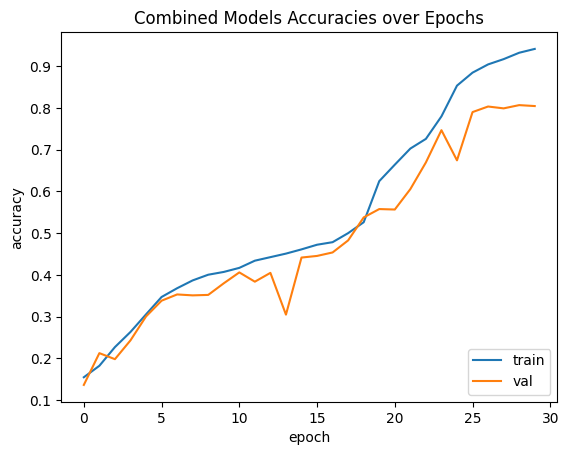

In [30]:
plt.plot(parallel.history.history["accuracy"])
plt.plot(parallel.history.history["val_accuracy"])
plt.title("Combined Models Accuracies over Epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "val"], loc="lower right")
plt.savefig("figs/combined.png")

In [31]:
parallel.predict(input_MFCC_data=mfcc_valid_x, input_spect_data=spect_valid_x, input_embed_data=embed_valid_x, true_labels=mfcc_valid_y)

100/100 [==============================] - 13s 57ms/step
Classification Report:
              precision    recall  f1-score   support

       blues       0.87      0.81      0.84       111
   classical       0.98      0.94      0.96       112
     country       0.76      0.70      0.73       105
       disco       0.69      0.79      0.74        92
      hiphop       0.89      0.85      0.87       110
        jazz       0.88      0.95      0.91        78
       metal       0.85      0.88      0.87       114
         pop       0.83      0.74      0.78       102
      reggae       0.85      0.77      0.81        81
        rock       0.57      0.69      0.63        95

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.82      1000

Overall Accuracy: 0.81
